In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inspect the Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/StrokeGaurd/Cereberal_Dataset.csv')

In [3]:
df.shape

(43400, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64
******************************
ever_married
Yes    27938
No     15462
Name: count, dtype: int64
******************************
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64
******************************
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64
******************************
smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64
******************************







#EDA(Exploratory data analysis)

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [11]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


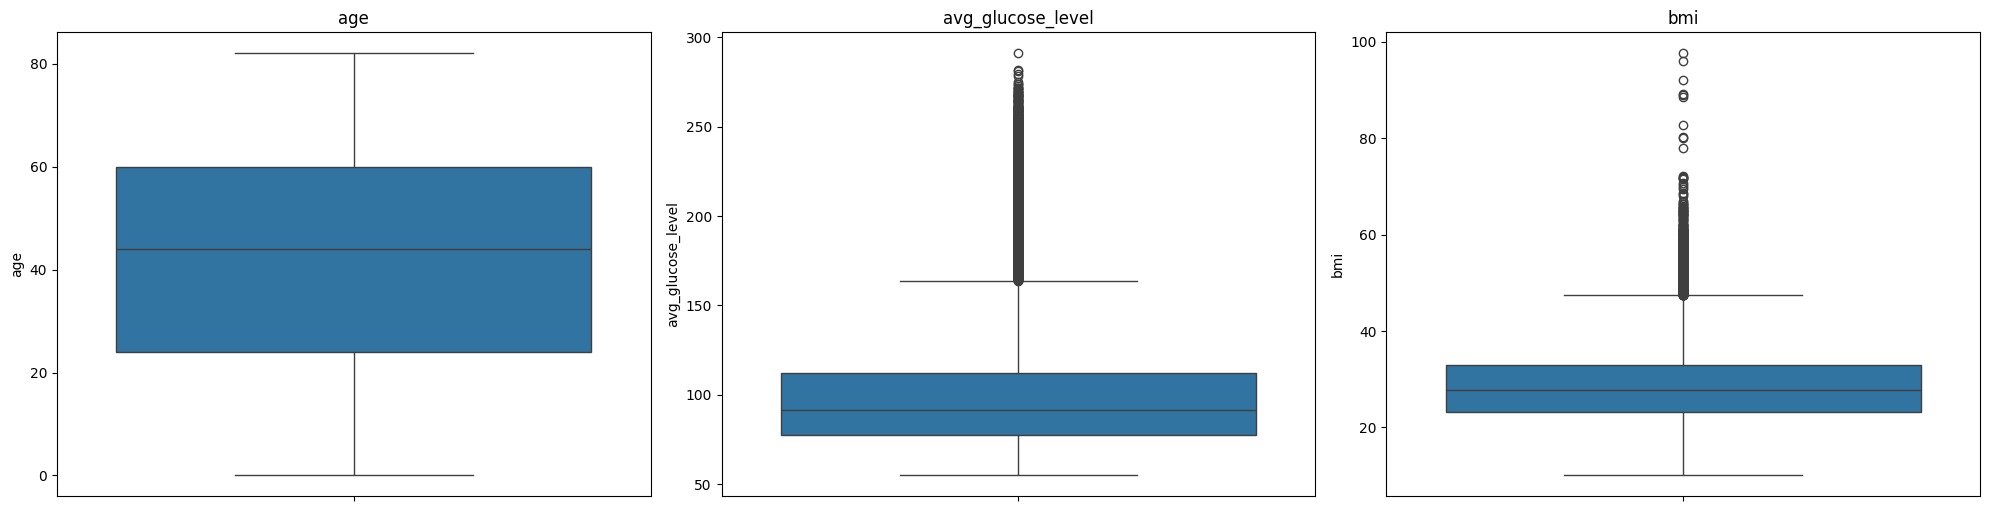

In [12]:
#check for outliers
columns_to_check = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

In [13]:
# Define a function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for column in columns_to_check:
    df = cap_outliers(df, column)
print(df.shape)

(43400, 12)


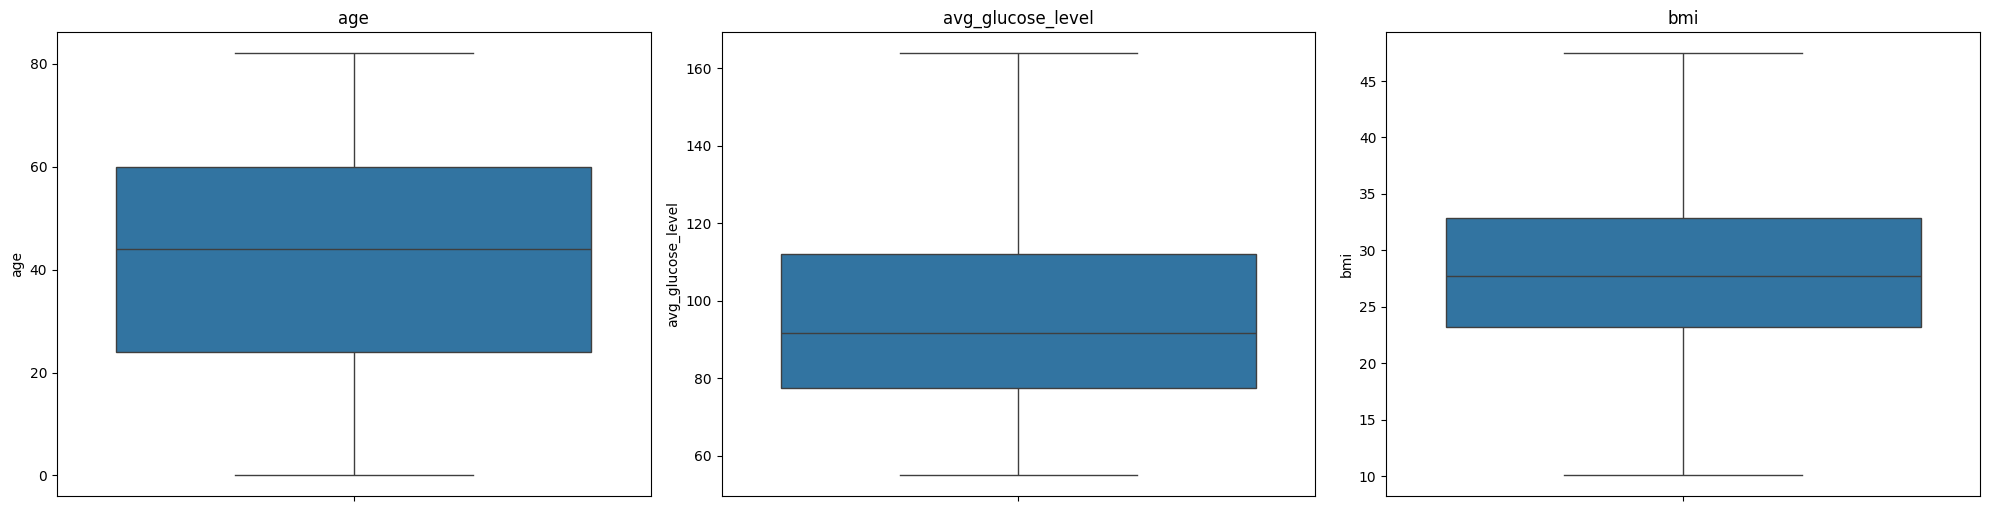

In [14]:

plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

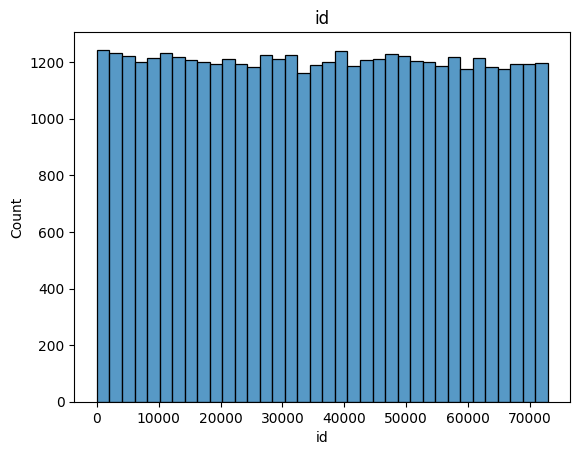

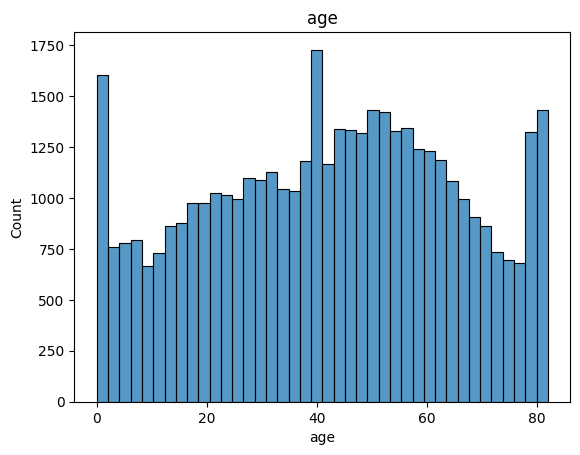

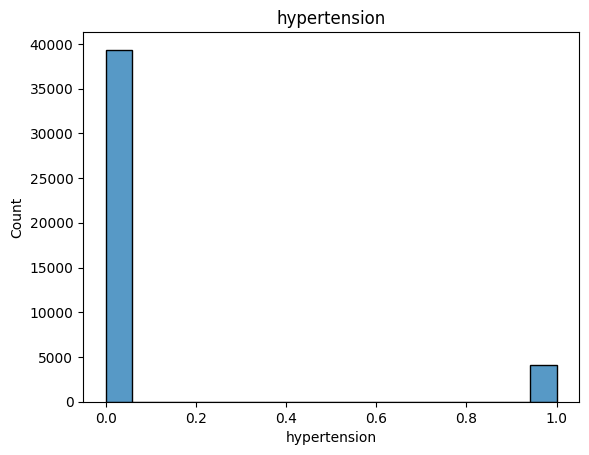

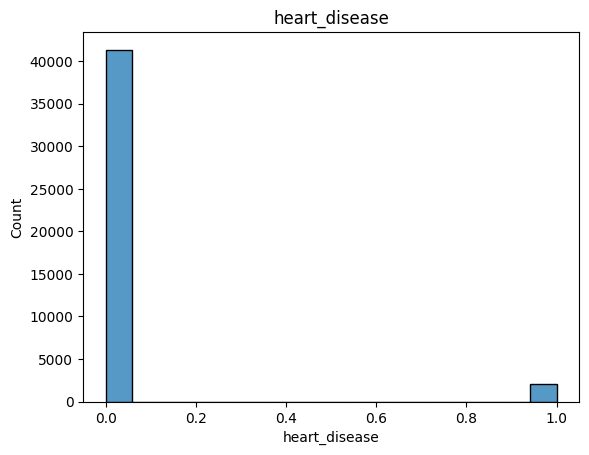

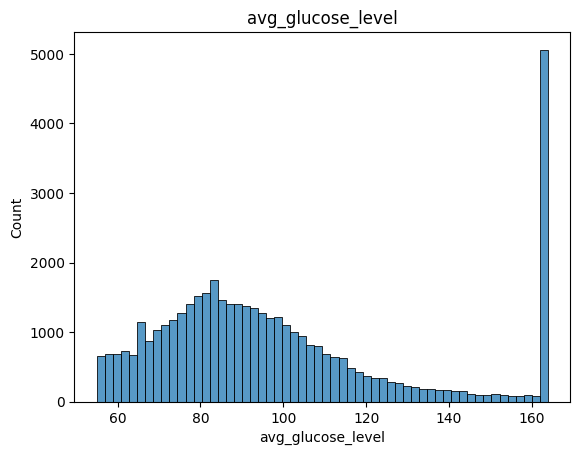

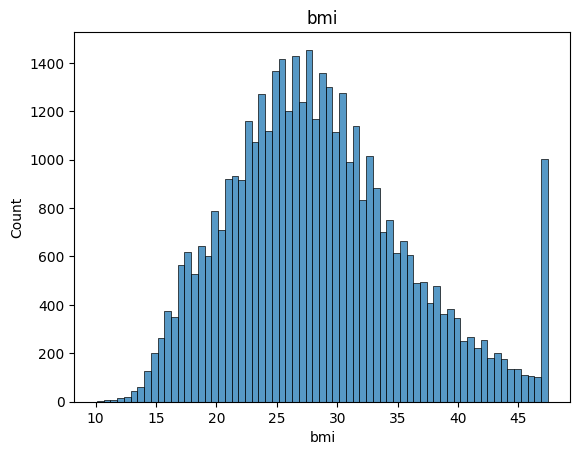

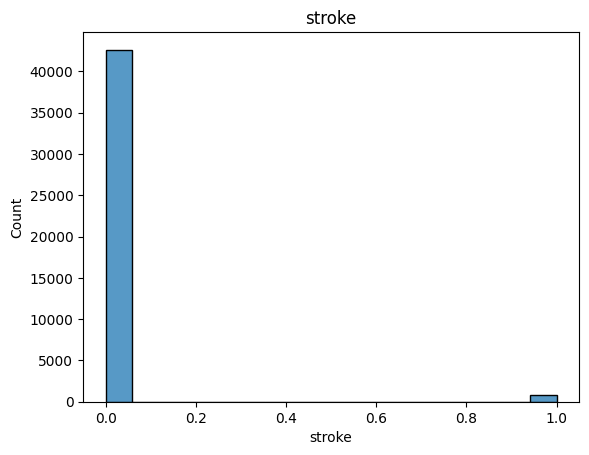

In [15]:
#histogram to understand the distribution of Numerical Features
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.title(i)
  plt.show()

In [16]:
column_names = df.columns
column_names

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

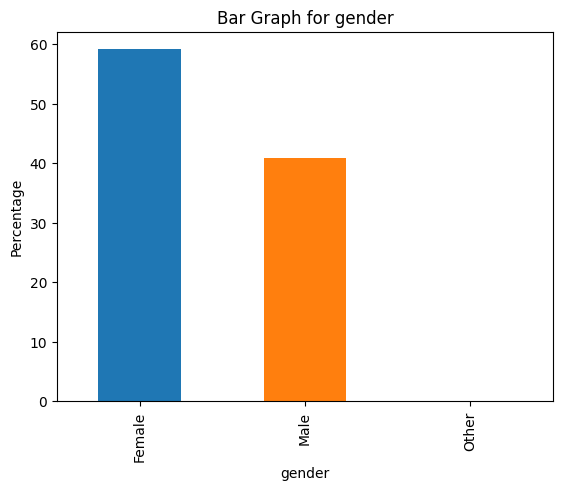

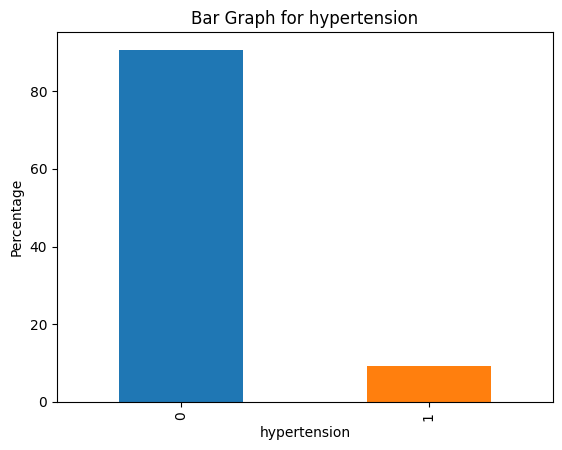

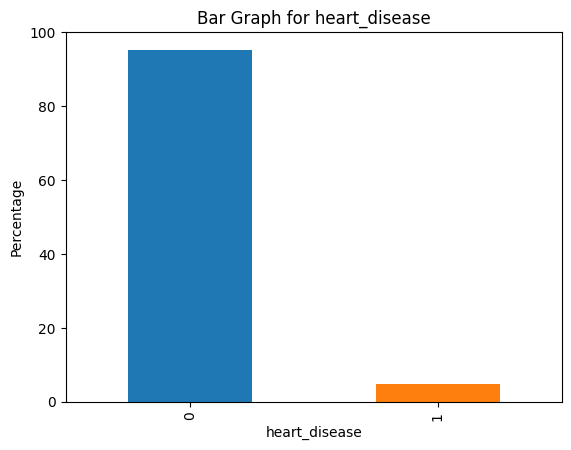

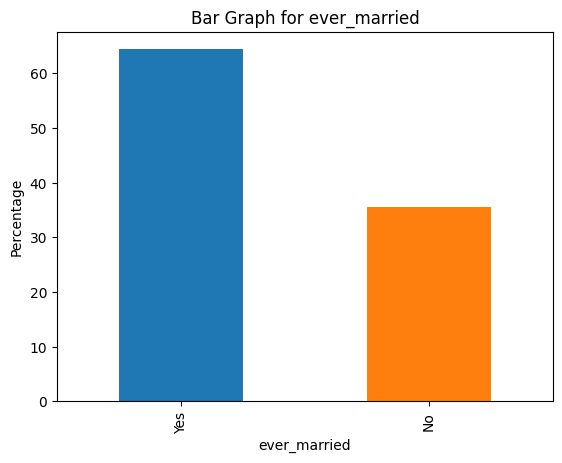

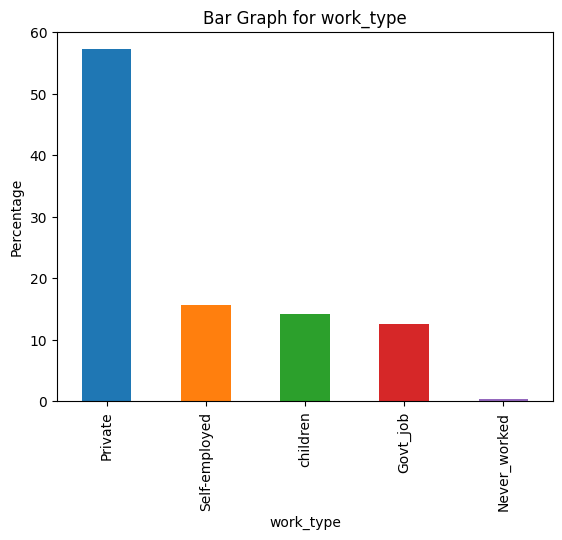

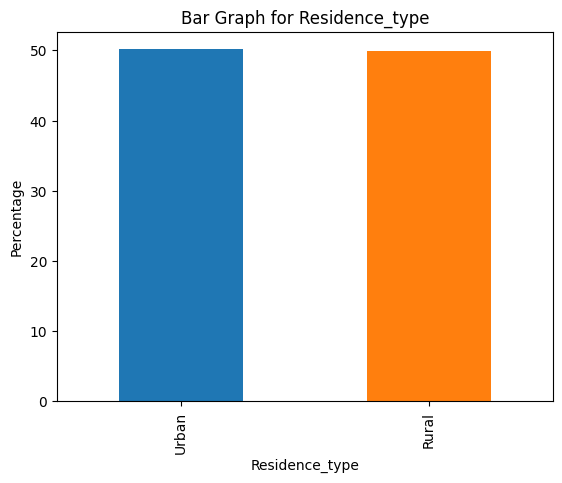

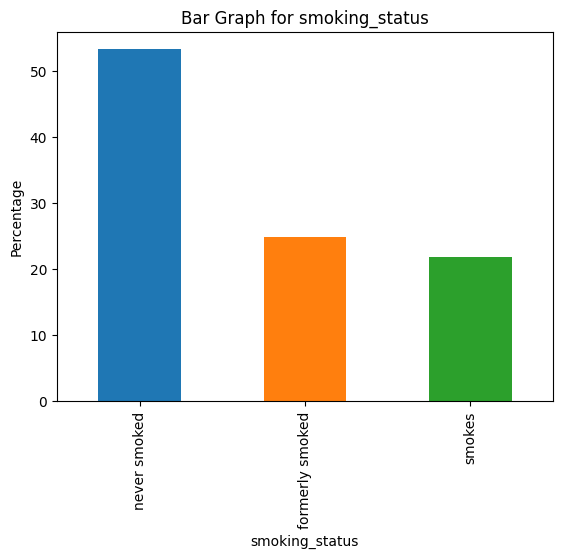

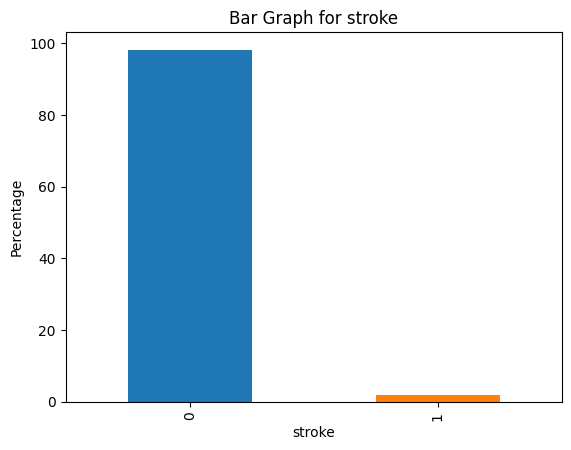

In [17]:
#Bar Graph to understand the distribution of Features

# Define a color palette
colors = plt.cm.tab10.colors

# Identify categorical features in your DataFrame
features = ['gender',  'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']

for i, feature in enumerate(features):
    total_count = df[feature].count()
    value_counts = df[feature].value_counts()
    percentages = (value_counts / total_count) * 100

    # Plot the bar graph with a different color for each category
    percentages.plot(kind='bar', color=[colors[i % len(colors)] for i in range(len(percentages))])
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.title(f'Bar Graph for {feature}')
    plt.show()

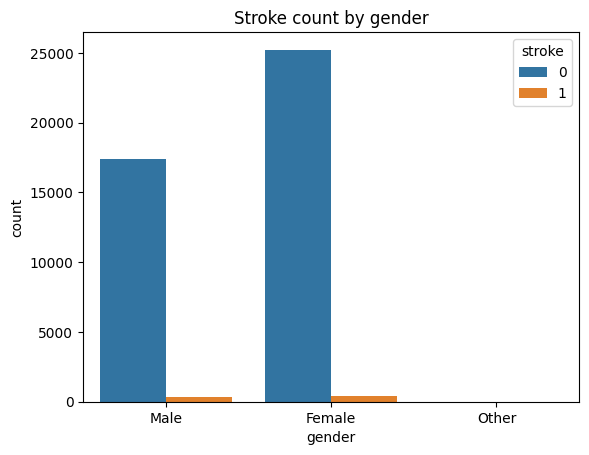

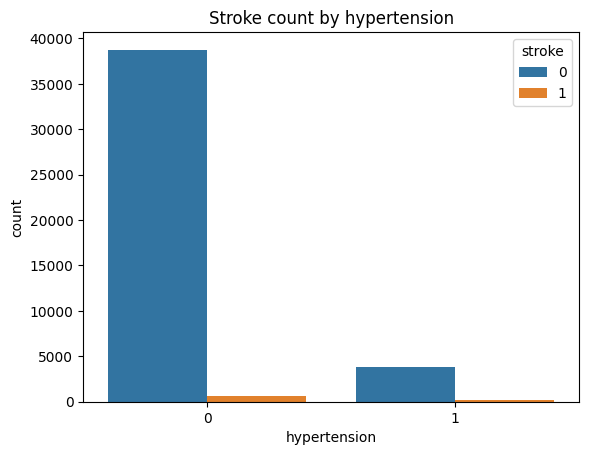

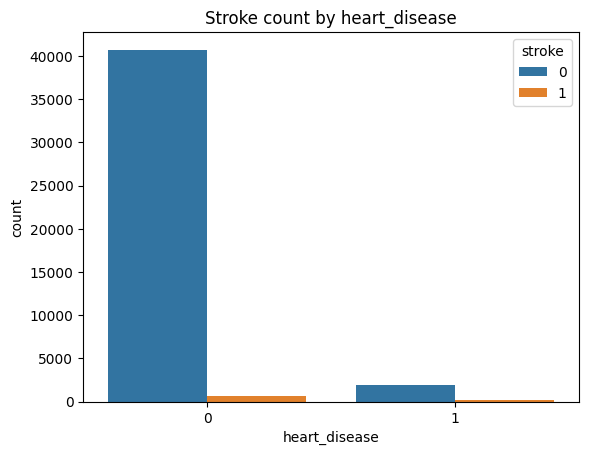

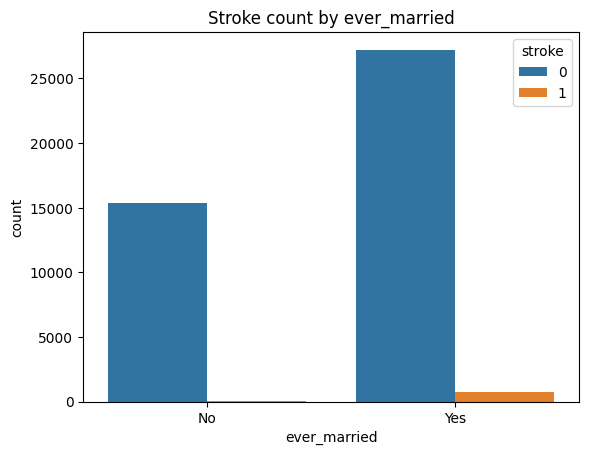

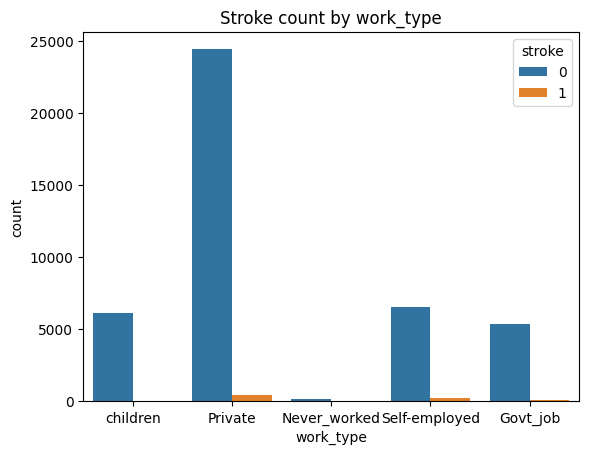

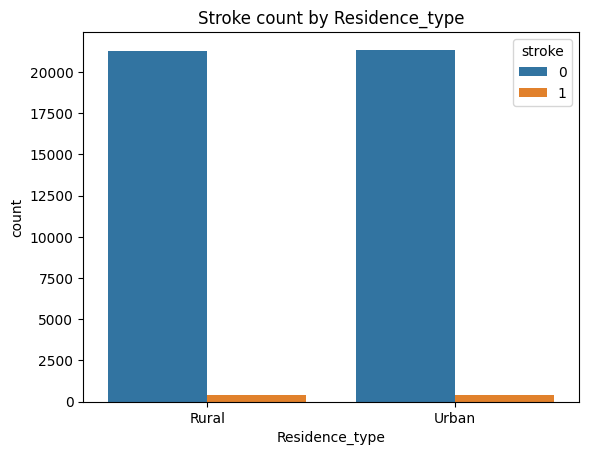

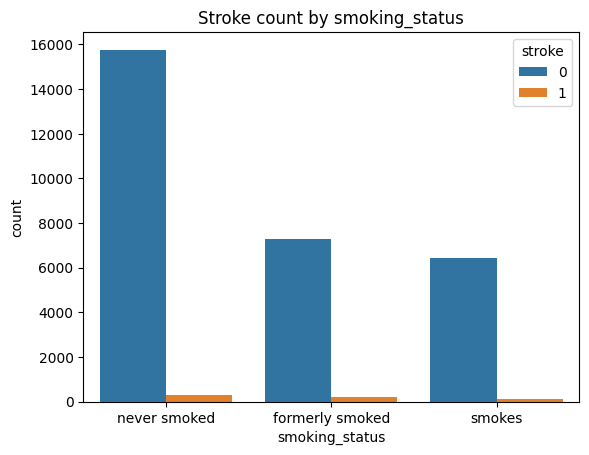

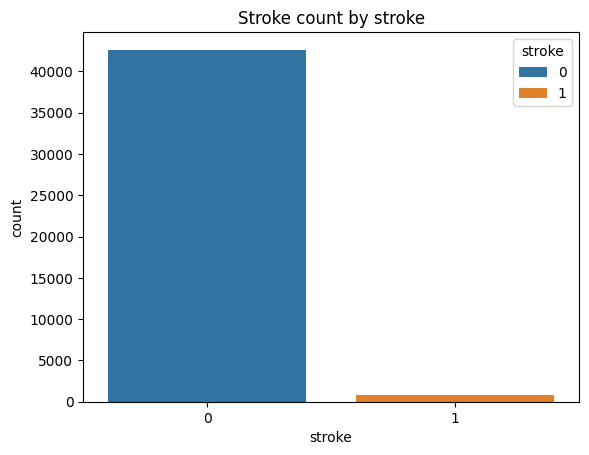

In [18]:
# Plot graphs that show the number who had stroke for categorical features.
features = ['gender',  'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']
for feature in features:
    title = "Stroke count by " + feature
    sns.countplot(data=df, x=feature, hue="stroke")
    plt.title(title)
    plt.show()

In [19]:
Heat_Map = df.select_dtypes(include='number').corr()
Heat_Map

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.030113,0.019488,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.202838,0.376689,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.136965,0.161800,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.126289,0.061250,0.113763
avg_glucose_level,0.030113,0.202838,0.136965,0.126289,1.000000,0.163122,0.067693
bmi,0.019488,0.376689,0.161800,0.061250,0.163122,1.000000,0.022677
stroke,0.002976,0.156049,0.075332,0.113763,0.067693,0.022677,1.000000


<Axes: >

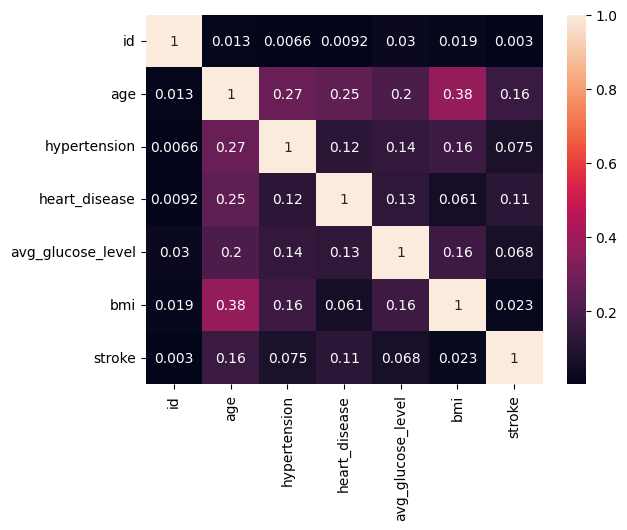

In [20]:
sns.heatmap(Heat_Map,annot=True)

#1. Data Cleaning

In [21]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [22]:
missing_value_clm_gre_20 = missing_value_per[missing_value_per > 20].keys()
missing_value_clm_gre_20

Index(['smoking_status'], dtype='object')

In [23]:
df2_drop_clm = df.drop(columns=missing_value_clm_gre_20)
df2_drop_clm.shape

(43400, 11)

In [24]:
df3_num=df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,30669,3.0,0,0,95.12,18.0,0
1,30468,58.0,1,0,87.96,39.2,0
2,16523,8.0,0,0,110.89,17.6,0
3,56543,70.0,0,0,69.04,35.9,0
4,46136,14.0,0,0,161.28,19.1,0


<Axes: >

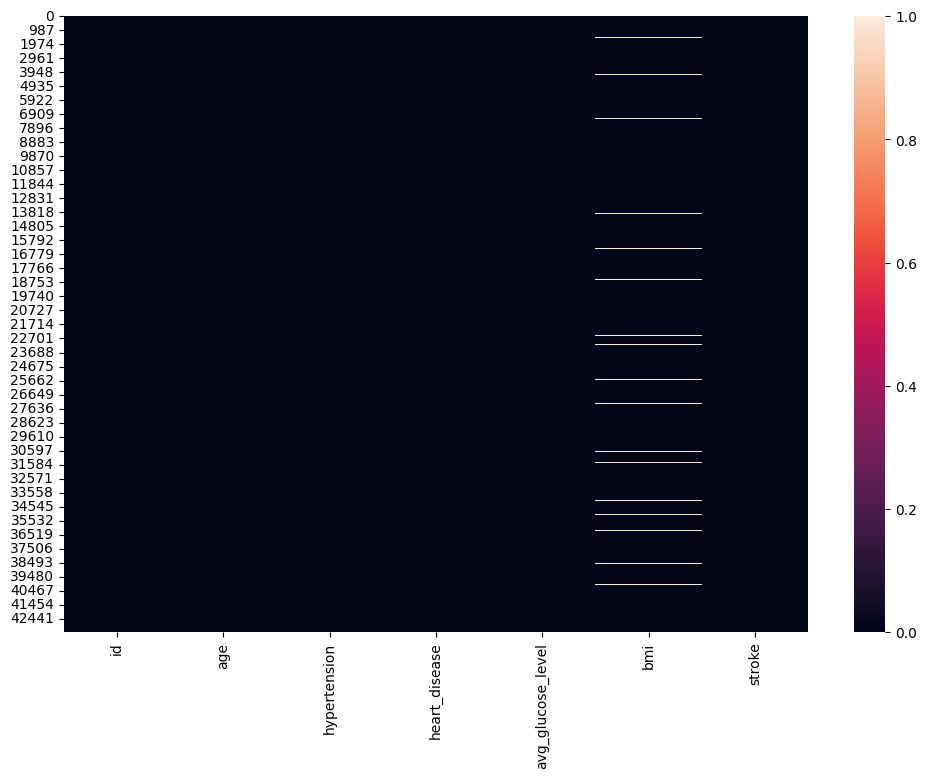

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df3_num.isnull())

In [26]:
df3_num[df3_num.isnull().any(axis=1)]

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
81,51676,61.0,0,0,163.865,NaN,1
95,31091,34.0,0,1,106.230,NaN,0
113,54312,76.0,1,0,163.865,NaN,0
186,11999,63.0,0,0,79.920,NaN,0
231,22470,61.0,0,0,163.865,NaN,0
...,...,...,...,...,...,...,...
43317,2558,62.0,0,1,72.290,NaN,0
43339,10463,76.0,0,0,100.550,NaN,1
43351,7580,58.0,1,0,99.290,NaN,0
43371,18119,78.0,0,0,163.865,NaN,0


In [27]:
df3_num.isnull().sum()

id                      0
age                     0
hypertension            0
heart_disease           0
avg_glucose_level       0
bmi                  1462
stroke                  0
dtype: int64

In [28]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['bmi']

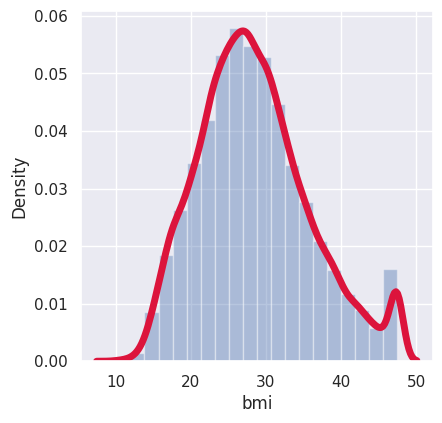

In [29]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [30]:
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum()

0

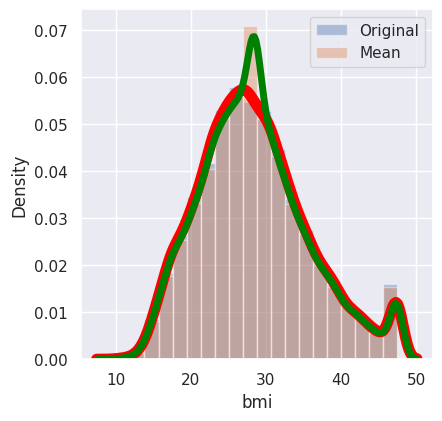

In [31]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df4_num_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

In [32]:
df4_num_mean.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [33]:
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum()

0

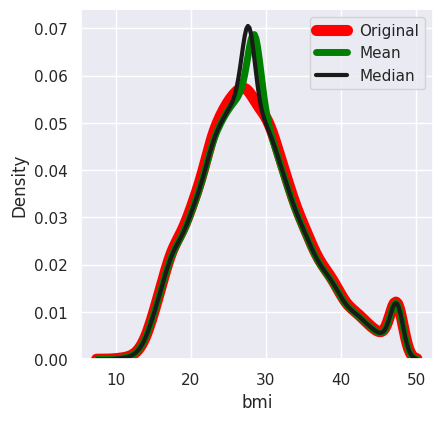

In [34]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df4_num_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df5_num_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [35]:
df5_num_median.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

<Axes: >

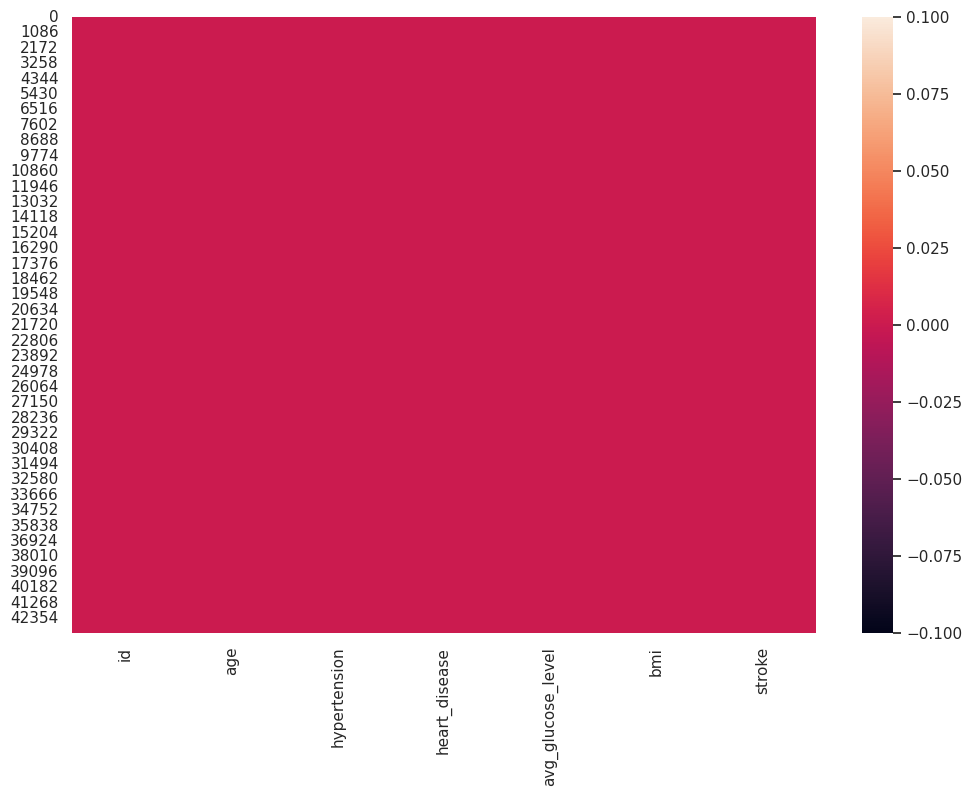

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df4_num_mean.isnull())

In [37]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN


In [38]:
cat_vars.isnull().sum()

gender                0
ever_married          0
work_type             0
Residence_type        0
smoking_status    13292
dtype: int64

In [39]:
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

gender             0.000000
ever_married       0.000000
work_type          0.000000
Residence_type     0.000000
smoking_status    30.626728
dtype: float64

In [40]:
isnull_per=cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['smoking_status'], dtype='object')

In [41]:
cat_vars['smoking_status'].fillna('Missing')

0                Missing
1           never smoked
2                Missing
3        formerly smoked
4                Missing
              ...       
43395       never smoked
43396    formerly smoked
43397    formerly smoked
43398       never smoked
43399       never smoked
Name: smoking_status, Length: 43400, dtype: object

In [42]:
cat_vars['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

In [43]:
cat_vars['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [44]:
cat_vars['smoking_status'].fillna(cat_vars['smoking_status'].mode()[0])

0           never smoked
1           never smoked
2           never smoked
3        formerly smoked
4           never smoked
              ...       
43395       never smoked
43396    formerly smoked
43397    formerly smoked
43398       never smoked
43399       never smoked
Name: smoking_status, Length: 43400, dtype: object

In [45]:
cat_vars['smoking_status'].fillna(cat_vars['smoking_status'].mode()[0]).value_counts()

smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [46]:
cat_vars_copy= cat_vars.copy()

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

smoking_status = never smoked


In [47]:
cat_vars_copy.isnull().sum().sum()

0

In [48]:
cat_vars_copy.isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

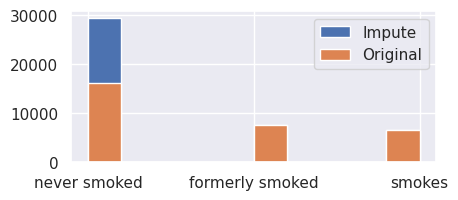

In [49]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

##Merge Numerical and Categorical Variables

In [50]:
data = pd.concat([df5_num_median,cat_vars_copy ], axis=1)
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,30669,3.0,0,0,95.120,18.00,0,Male,No,children,Rural,never smoked
1,30468,58.0,1,0,87.960,39.20,0,Male,Yes,Private,Urban,never smoked
2,16523,8.0,0,0,110.890,17.60,0,Female,No,Private,Urban,never smoked
3,56543,70.0,0,0,69.040,35.90,0,Female,Yes,Private,Rural,formerly smoked
4,46136,14.0,0,0,161.280,19.10,0,Male,No,Never_worked,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.640,20.40,0,Female,No,children,Urban,never smoked
43396,5450,56.0,0,0,163.865,47.45,0,Female,Yes,Govt_job,Urban,formerly smoked
43397,28375,82.0,1,0,91.940,28.90,0,Female,Yes,Private,Urban,formerly smoked
43398,27973,40.0,0,0,99.160,33.20,0,Male,Yes,Private,Urban,never smoked


In [51]:
data.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

##Dividing into Target and Predictor Variables

In [55]:
X=data.drop(['stroke'],axis=1)
Y=data['stroke']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,shuffle=True,random_state=42)

In [57]:
Y_train.value_counts()

stroke
0    31975
1      575
Name: count, dtype: int64

In [59]:
Y_test.value_counts()

stroke
0    10642
1      208
Name: count, dtype: int64

#Feature Engineering

**Feature Scaling**

In [60]:
#using standardization
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
sc = StandardScaler()
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [61]:
X_train.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
38951,13378,1.548049,1,1,-0.639550,-0.107166,Female,No,Private,Urban,never smoked
29959,16064,0.660982,0,1,-0.476039,1.613681,Male,Yes,Private,Rural,never smoked
28750,23891,0.527922,0,0,-0.681893,0.636240,Female,No,Private,Urban,smokes
33574,26667,-1.113152,0,0,-0.824558,-1.194741,Female,No,Private,Urban,never smoked
9846,10856,-1.790871,0,0,-0.228493,-1.662811,Female,No,children,Rural,never smoked


In [62]:
X_test.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
29554,56155,0.527922,0,0,-1.365251,0.181937,Female,Yes,Private,Rural,never smoked
10797,72314,-1.024445,0,0,-0.824883,0.842742,Female,No,Private,Rural,never smoked
23773,43678,-0.669618,0,0,-0.001792,0.237004,Female,No,Private,Urban,never smoked
26068,48491,0.572275,0,0,2.104141,1.503547,Female,Yes,Govt_job,Urban,smokes
28893,32692,1.148869,0,0,2.104141,1.407179,Female,Yes,Private,Rural,never smoked


In [63]:
#using Normalization

from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [64]:
X_train.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
38951,13378,0.938965,1,1,0.226244,0.471218,Female,No,Private,Urban,never smoked
29959,16064,0.694824,0,1,0.272356,0.805890,Male,Yes,Private,Rural,never smoked
28750,23891,0.658203,0,0,0.214302,0.615797,Female,No,Private,Urban,smokes
33574,26667,0.206543,0,0,0.174069,0.259705,Female,No,Private,Urban,never smoked
9846,10856,0.020020,0,0,0.342167,0.168675,Female,No,children,Rural,never smoked


**Encoded Categorical Data**


In [65]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [66]:
ordinal_features = ['ever_married']
nominal_features = ['gender', 'work_type', 'Residence_type', 'smoking_status']

In [67]:
ordinal_encoder = OrdinalEncoder(categories=[['No', 'Yes']])
X_train[ordinal_features] = ordinal_encoder.fit_transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])

In [68]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_train = encoder.fit_transform(X_train[nominal_features])
encoded_test = encoder.transform(X_test[nominal_features])

In [69]:
encoded_columns = encoder.get_feature_names_out(nominal_features)
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)

In [70]:
encoded_train_df.head()

,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
38951,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
29959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28750,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
33574,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9846,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [71]:
X_train = X_train.drop(columns=nominal_features)
X_test = X_test.drop(columns=nominal_features)

In [72]:
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

In [73]:
X = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train, Y_test], axis=0)

In [74]:
X_train.shape

(32550, 16)

In [75]:
X_train.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
38951,13378,0.938965,1,1,0.226244,0.471218,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
29959,16064,0.694824,0,1,0.272356,0.805890,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28750,23891,0.658203,0,0,0.214302,0.615797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
33574,26667,0.206543,0,0,0.174069,0.259705,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9846,10856,0.020020,0,0,0.342167,0.168675,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [76]:
X_train.tail()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
6265,27697,0.511719,0,0,0.275571,0.530120,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
11284,69430,0.475098,0,0,0.197860,0.232932,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,29479,0.633789,0,0,0.502457,0.642570,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
860,67603,0.853516,0,0,1.000000,0.647925,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15795,47959,0.731445,0,0,1.000000,0.412316,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [110]:
X_train.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'ever_married', 'gender_Male', 'gender_Other',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

**Feature Selection**

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the selected features
rf_selected_features = X_train.columns[indices[:3]]
print("Random Forest selected features:", rf_selected_features)

Random Forest selected features: Index(['id', 'bmi', 'avg_glucose_level'], dtype='object')


In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature selection using RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, Y)

# Get the selected features
rfe_selected_features = X.columns[fit.support_]
print("RFE selected features:", rfe_selected_features)

X_selected = X[rfe_selected_features]

RFE selected features: Index(['age', 'heart_disease', 'avg_glucose_level', 'bmi',
       'work_type_children'],
      dtype='object')


In [79]:
# Get feature rankings
rfe_feature_ranking = fit.ranking_
rfe_feature_importances = 1 / (rfe_feature_ranking)  # Inverse of ranking for importance

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_feature_ranking,
    'Importance': rfe_feature_importances
}).sort_values(by='Importance', ascending=False)

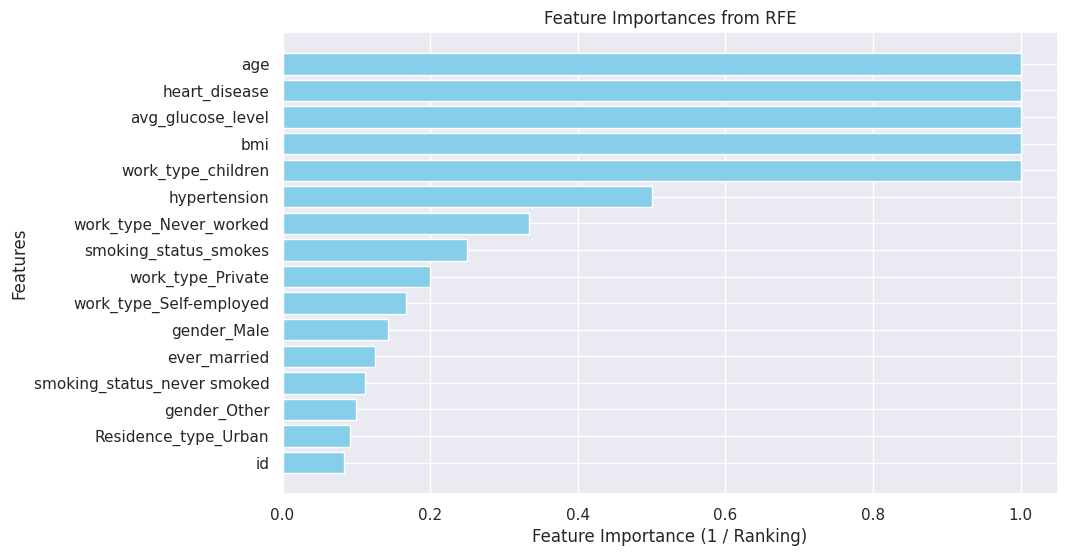

In [80]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (1 / Ranking)')
plt.ylabel('Features')
plt.title('Feature Importances from RFE')
plt.gca().invert_yaxis()
plt.show()

#Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(rf_model, X_selected, Y, cv=skf, scoring=scorer)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean()}')
print(f'Standard deviation of CV accuracy: {cv_scores.std()}')


Cross-validation scores: [0.97569124 0.97684332 0.97615207 0.9733871  0.97465438]
Mean CV accuracy: 0.9753456221198157
Standard deviation of CV accuracy: 0.0012105000494528674


Fold 1:
Accuracy: 0.9756912442396314
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.982809    0.112676  0.975691     0.547742      0.967170
recall        0.992609    0.051282  0.975691     0.521946      0.975691
f1-score      0.987685    0.070485  0.975691     0.529085      0.971200
support    8524.000000  156.000000  0.975691  8680.000000   8680.000000


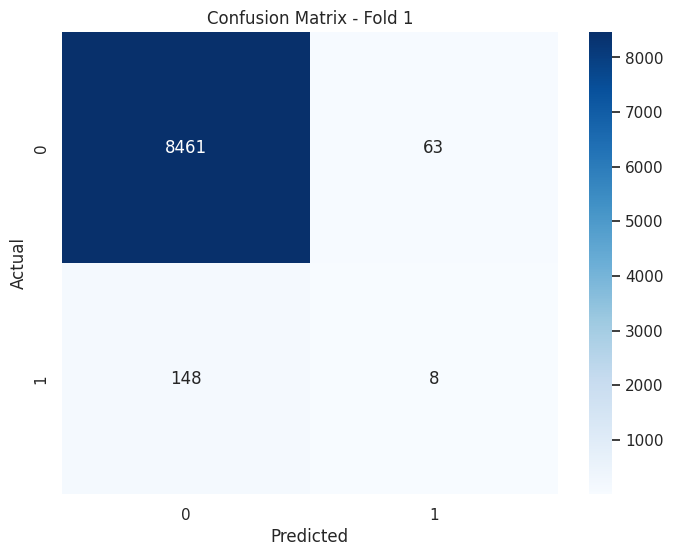

Fold 2:
Accuracy: 0.9768433179723502
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.983277    0.173913  0.976843     0.578595      0.968731
recall        0.993313    0.076923  0.976843     0.535118      0.976843
f1-score      0.988270    0.106667  0.976843     0.547468      0.972425
support    8524.000000  156.000000  0.976843  8680.000000   8680.000000


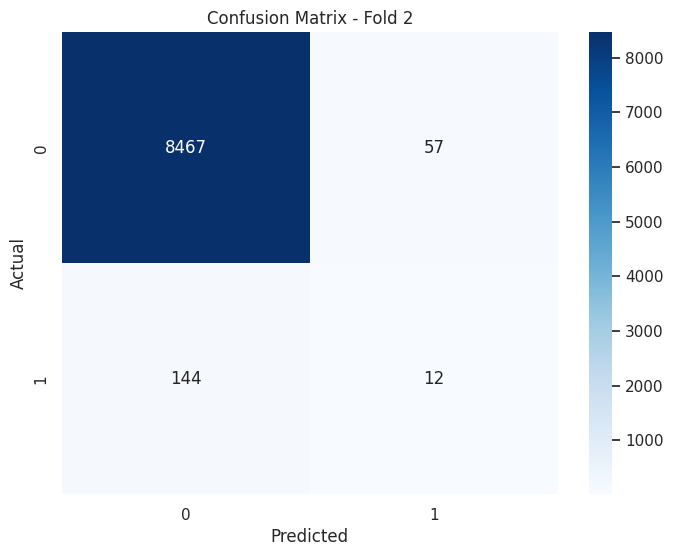

Fold 3:
Accuracy: 0.9761520737327188
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.982815    0.132353  0.976152     0.557584      0.967432
recall        0.993078    0.057325  0.976152     0.525201      0.976152
f1-score      0.987919    0.080000  0.976152     0.533960      0.971497
support    8523.000000  157.000000  0.976152  8680.000000   8680.000000


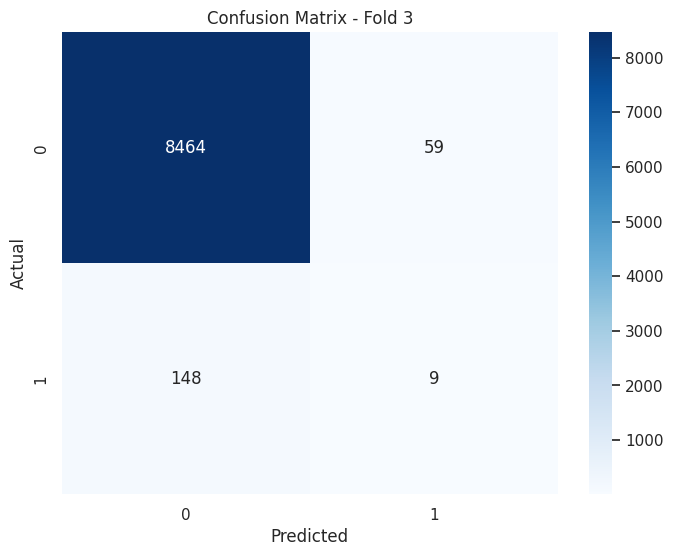

Fold 4:
Accuracy: 0.9733870967741935
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.982317    0.059524  0.973387     0.520921      0.965626
recall        0.990731    0.031847  0.973387     0.511289      0.973387
f1-score      0.986506    0.041494  0.973387     0.514000      0.969413
support    8523.000000  157.000000  0.973387  8680.000000   8680.000000


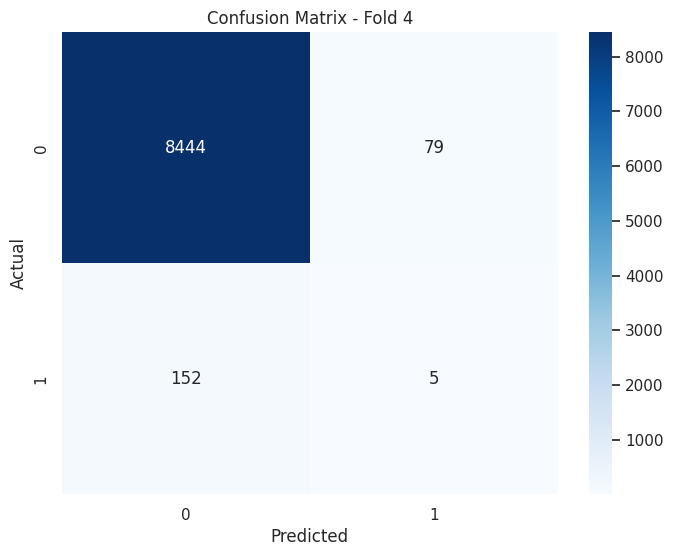

Fold 5:
Accuracy: 0.9746543778801844
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.982676    0.101266  0.974654     0.541971      0.966734
recall        0.991670    0.050955  0.974654     0.521313      0.974654
f1-score      0.987153    0.067797  0.974654     0.527475      0.970524
support    8523.000000  157.000000  0.974654  8680.000000   8680.000000


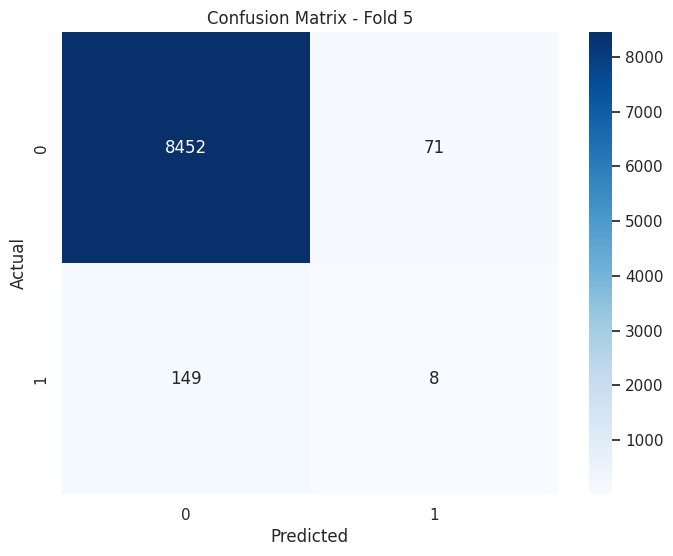

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

cv_results = []

for train_index, test_index in skf.split(X_selected, Y):
    X_train_fold, X_test_fold = X_selected.iloc[train_index], X_selected.iloc[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

    rf_model.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = rf_model.predict(X_test_fold)

    accuracy = accuracy_score(Y_test_fold, Y_pred_fold)
    report = classification_report(Y_test_fold, Y_pred_fold, output_dict=True)
    conf_matrix = confusion_matrix(Y_test_fold, Y_pred_fold)

    cv_results.append((accuracy, report, conf_matrix))

for i, (accuracy, report, conf_matrix) in enumerate(cv_results):
    print(f'Fold {i+1}:')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{pd.DataFrame(report)}')
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.show()


Fold 1:
Accuracy: 0.9908344332013491
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      6819
     Class 1       1.00      0.98      0.99      6819

    accuracy                           0.99     13638
   macro avg       0.99      0.99      0.99     13638
weighted avg       0.99      0.99      0.99     13638





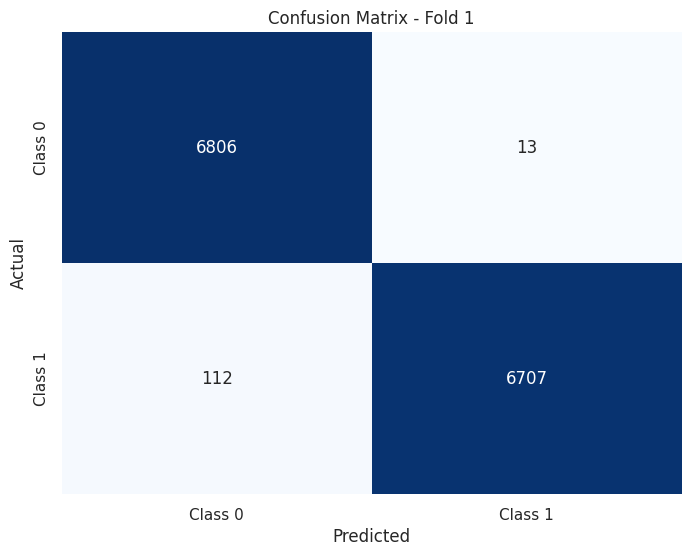

Fold 2:
Accuracy: 0.9899538021558993
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      6819
     Class 1       1.00      0.98      0.99      6818

    accuracy                           0.99     13637
   macro avg       0.99      0.99      0.99     13637
weighted avg       0.99      0.99      0.99     13637





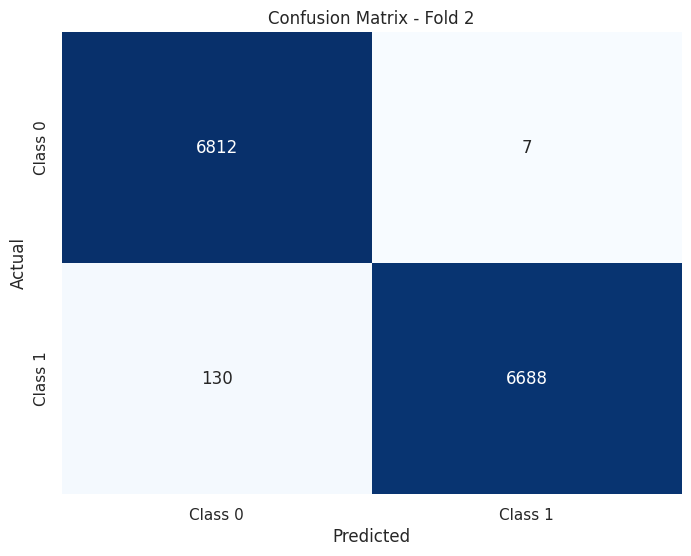

Fold 3:
Accuracy: 0.9895138226882746
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      6819
     Class 1       1.00      0.98      0.99      6818

    accuracy                           0.99     13637
   macro avg       0.99      0.99      0.99     13637
weighted avg       0.99      0.99      0.99     13637





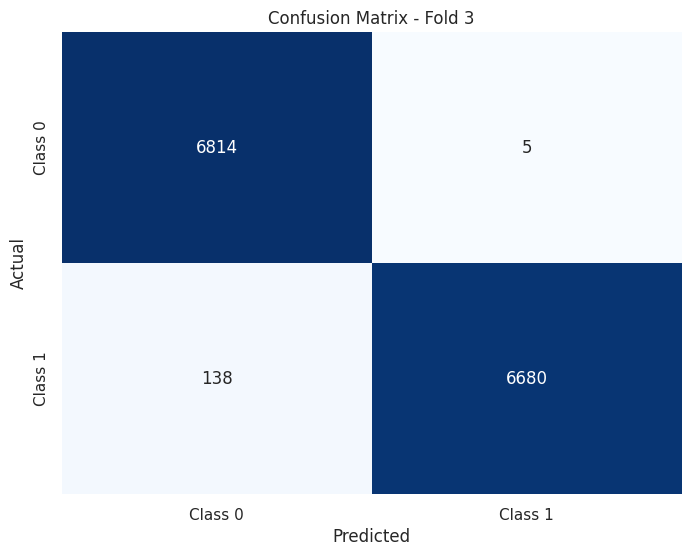

Fold 4:
Accuracy: 0.9898804722446286
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      6818
     Class 1       1.00      0.98      0.99      6819

    accuracy                           0.99     13637
   macro avg       0.99      0.99      0.99     13637
weighted avg       0.99      0.99      0.99     13637





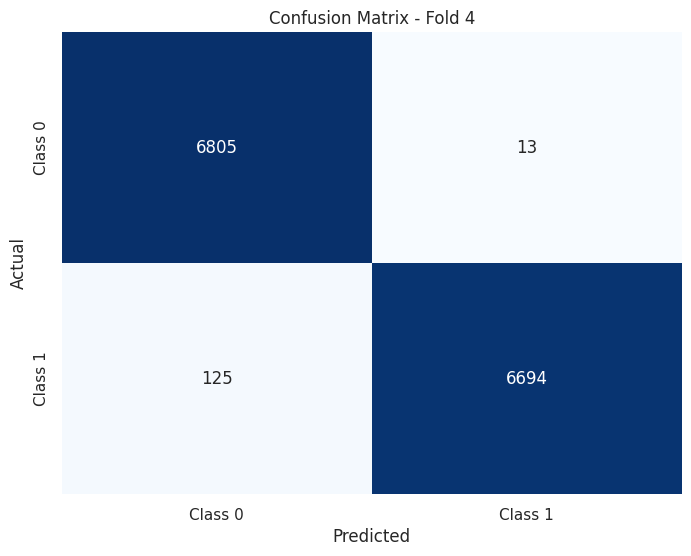

Fold 5:
Accuracy: 0.9898804722446286
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      6818
     Class 1       1.00      0.98      0.99      6819

    accuracy                           0.99     13637
   macro avg       0.99      0.99      0.99     13637
weighted avg       0.99      0.99      0.99     13637





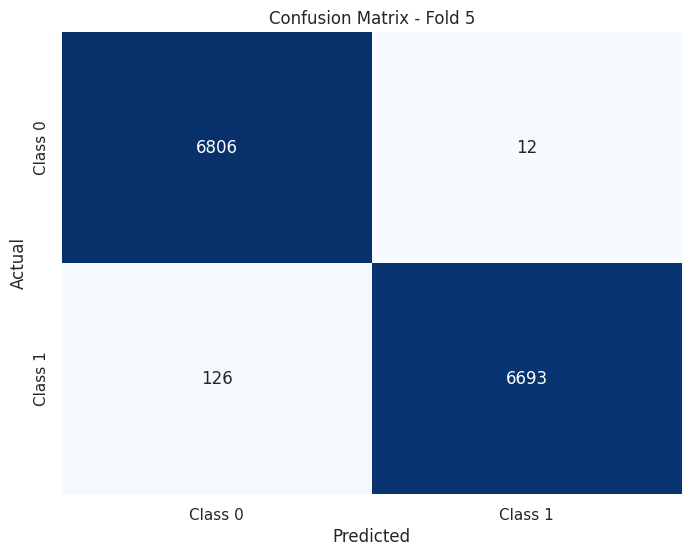

Cross-validation scores: [0.9908344332013491, 0.9899538021558993, 0.9895138226882746, 0.9898804722446286, 0.9898804722446286]
Mean CV accuracy: 0.9900126005069559
Standard deviation of CV accuracy: 0.00043876218877208004


In [83]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
cv_scores = []
classification_reports = []

# Perform cross-validation
for train_index, test_index in skf.split(X_resampled, Y_resampled):
    X_train_fold, X_test_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    Y_train_fold, Y_test_fold = Y_resampled.iloc[train_index], Y_resampled.iloc[test_index]

    # Fit model on training fold
    rf_model.fit(X_train_fold, Y_train_fold)

    # Predict on testing fold
    Y_pred = rf_model.predict(X_test_fold)

    # Evaluate accuracy
    accuracy = accuracy_score(Y_test_fold, Y_pred)
    cv_scores.append(accuracy)

    # Generate classification report
    report = classification_report(Y_test_fold, Y_pred, target_names=['Class 0', 'Class 1'])
    classification_reports.append(report)

    # Print classification report for each fold
    print(f"Fold {len(cv_scores)}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("\n")

    # Plot confusion matrix for each fold
    conf_matrix = confusion_matrix(Y_test_fold, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {len(cv_scores)}')
    plt.show()

# Calculate and print mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {mean_accuracy}")
print(f"Standard deviation of CV accuracy: {std_accuracy}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define the models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1),  # Reduced number of estimators
    'XGBoost': XGBClassifier(scale_pos_weight=len(Y_resampled[Y_resampled == 0]) / len(Y_resampled[Y_resampled == 1]), random_state=42, n_estimators=50, n_jobs=-1),  # Reduced number of estimators
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=50)  # Reduced number of estimators
}

# Evaluate each model using cross-validation
cv_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracies = []
    reports = []
    conf_matrices = []

    for train_index, test_index in skf.split(X_resampled, Y_resampled):
        # Use array indexing for NumPy arrays
        X_train_fold, X_test_fold = X_resampled[train_index], X_resampled[test_index]
        Y_train_fold, Y_test_fold = Y_resampled[train_index], Y_resampled[test_index]

        model.fit(X_train_fold, Y_train_fold)
        Y_pred_fold = model.predict(X_test_fold)

        accuracies.append(accuracy_score(Y_test_fold, Y_pred_fold))
        reports.append(classification_report(Y_test_fold, Y_pred_fold, output_dict=True))
        conf_matrices.append(confusion_matrix(Y_test_fold, Y_pred_fold))

    cv_results[model_name] = {
        'accuracies': accuracies,
        'reports': reports,
        'conf_matrices': conf_matrices
    }

# Print the results
for model_name, results in cv_results.items():
    mean_accuracy = np.mean(results['accuracies'])
    std_accuracy = np.std(results['accuracies'])
    print(f"\nModel: {model_name}")
    print(f"Mean CV Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of CV Accuracy: {std_accuracy}")

    for i, (accuracy, report, conf_matrix) in enumerate(zip(results['accuracies'], results['reports'], results['conf_matrices'])):
        print(f"\nFold {i+1}:")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{pd.DataFrame(report).transpose()}")


Evaluating Random Forest...


KeyError: "None of [Index([    0,     1,     2,     3,     4,     5,     7,     8,     9,    10,\n       ...\n       68171, 68173, 68175, 68177, 68178, 68180, 68181, 68182, 68183, 68184],\n      dtype='int64', length=54548)] are in the [columns]"

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression #Import LogisticRegression

# Define the models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1),  # Reduced number of estimators
    'XGBoost': XGBClassifier(scale_pos_weight=len(Y_resampled[Y_resampled == 0]) / len(Y_resampled[Y_resampled == 1]), random_state=42, n_estimators=50, n_jobs=-1),  # Reduced number of estimators
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=50)  # Reduced number of estimators
}

# Evaluate each model using cross-validation
cv_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    accuracies = []
    reports = []
    conf_matrices = []

    for train_index, test_index in skf.split(X_resampled, Y_resampled):
        # Use .iloc for integer-location based indexing with DataFrames
        X_train_fold, X_test_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        Y_train_fold, Y_test_fold = Y_resampled.iloc[train_index], Y_resampled.iloc[test_index]

        model.fit(X_train_fold, Y_train_fold)
        Y_pred_fold = model.predict(X_test_fold)

        accuracies.append(accuracy_score(Y_test_fold, Y_pred_fold))
        reports.append(classification_report(Y_test_fold, Y_pred_fold, output_dict=True))
        conf_matrices.append(confusion_matrix(Y_test_fold, Y_pred_fold))

    cv_results[model_name] = {
        'accuracies': accuracies,
        'reports': reports,
        'conf_matrices': conf_matrices
    }

# Print the results
for model_name, results in cv_results.items():
    mean_accuracy = np.mean(results['accuracies'])
    std_accuracy = np.std(results['accuracies'])
    print(f"\nModel: {model_name}")
    print(f"Mean CV Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of CV Accuracy: {std_accuracy}")

    for i, (accuracy, report, conf_matrix) in enumerate(zip(results['accuracies'], results['reports'], results['conf_matrices'])):
        print(f"\nFold {i+1}:")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{pd.DataFrame(report).transpose()}")

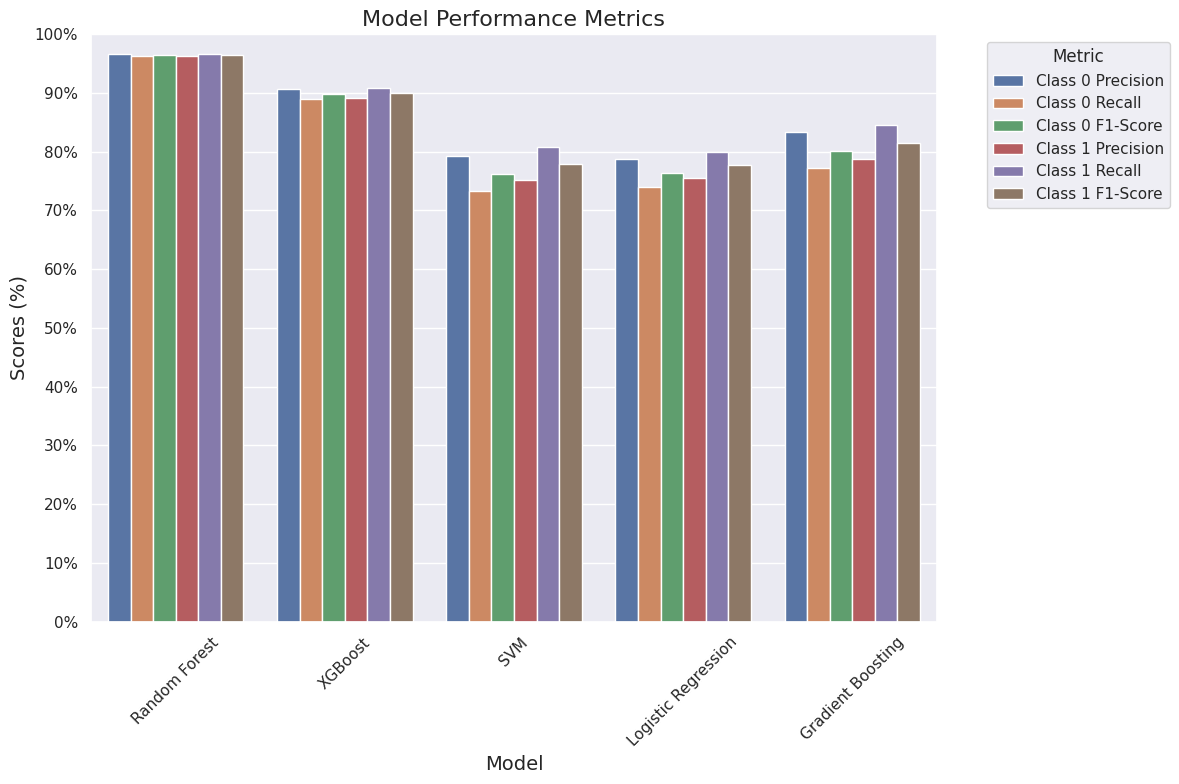

In [84]:
model_data = {
    'Model': ['Random Forest', 'XGBoost', 'SVM', 'Logistic Regression', 'Gradient Boosting'],
    'Mean CV Accuracy': [0.9648, 0.8935, 0.7722, 0.7715, 0.8098],
}

classes = ['Class 0 Precision', 'Class 0 Recall', 'Class 0 F1-Score',
           'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1-Score']

scores = [
    [0.9661, 0.9623, 0.9642, 0.9625, 0.9662, 0.9643],  # Random Forest
    [0.9075, 0.8899, 0.8987, 0.8920, 0.9093, 0.9006],  # XGBoost
    [0.7922, 0.7336, 0.7618, 0.7519, 0.8076, 0.7788],  # SVM
    [0.7872, 0.7404, 0.7631, 0.7549, 0.7998, 0.7767],  # Logistic Regression
    [0.8332, 0.7726, 0.8018, 0.7880, 0.8454, 0.8157],  # Gradient Boosting
]

expanded_model_data = []
for i, model in enumerate(model_data['Model']):
    for j, class_name in enumerate(classes):
        expanded_model_data.append({
            'Model': model,
            'Class': class_name,
            'Score': scores[i][j]
        })

df_models = pd.DataFrame(expanded_model_data)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Class', data=df_models, dodge=True)

plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Scores (%)', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits

plt.gca().set_yticks([i / 10 for i in range(11)])  # 0 to 1 in steps of 0.1
plt.gca().set_yticklabels([f'{int(i * 100)}%' for i in plt.gca().get_yticks()])

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install gradio

In [86]:
!pip install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB

In [87]:
import gradio as gr
import numpy as np
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import joblib

# Save your model to the local environment
model_path = 'rf_model.pkl'
joblib.dump(rf_model, model_path)

['rf_model.pkl']

In [89]:
model_path =  "/content/drive/MyDrive/StrokeGaurd/rf_model.pkl"
joblib.dump(rf_model, model_path)

['/content/drive/MyDrive/StrokeGaurd/rf_model.pkl']

In [111]:
model = joblib.load(model_path)

In [136]:
# Define the feature names
feature_names = [
    'id',
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'ever_married',
    'gender_Male',
    'gender_Other',
    'work_type_Never_worked',
    'work_type_Private',
    'work_type_Self-employed',
    'work_type_children',
    'Residence_type_Urban',
    'smoking_status_never smoked',
    'smoking_status_smokes'
]

In [151]:
def preprocess_input(input_data):
    # Create DataFrame
    input_df = pd.DataFrame(input_data)

    # Ensure all expected columns are present
    for feature in feature_names:
        if feature not in input_df.columns:
            input_df[feature] = 0  # Default value

    # Ensure categorical inputs are treated as strings
    categorical_features = ['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status']
    for feature in categorical_features:
        input_df[feature] = input_df[feature].astype(str)

    # Ordinal encoding for 'ever_married'
    ordinal_encoder = OrdinalEncoder(categories=[['No', 'Yes']])
    input_df['ever_married'] = ordinal_encoder.fit_transform(input_df[['ever_married']])

    # One-hot encoding for nominal features
    nominal_features = ['gender', 'work_type', 'Residence_type', 'smoking_status']
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_nominal = encoder.fit_transform(input_df[nominal_features])
    encoded_columns = encoder.get_feature_names_out(nominal_features)

    # Drop original nominal columns and concatenate
    input_df = input_df.drop(columns=nominal_features)
    encoded_df = pd.DataFrame(encoded_nominal, columns=encoded_columns, index=input_df.index)
    input_df = pd.concat([input_df, encoded_df], axis=1)

    # Scale the numerical features
    columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
    input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

    # Reorder columns to match training
    input_df = input_df[feature_names]

    return input_df


In [149]:
def predict_stroke(id, gender, age, hypertension, heart_disease, ever_married,
                   work_type, residence_type, avg_glucose_level, bmi,
                   smoking_status):
    try:
        # Prepare the input data as a dictionary
        input_data = {
    "id": [1],
    "age": [57],
    "hypertension": [0],
    "heart_disease": [1],
    "ever_married": ["Yes"],
    "avg_glucose_level": [67.41],
    "bmi": [32.9],
    "gender": ["Male"],
    "work_type": ["Govt_job"],
    "Residence_type": ["Rural"],
    "smoking_status": ["Never smoked"]
}


        print("Input Data:", input_data)

        # Convert the input data into a DataFrame
        input_df = pd.DataFrame(input_data)
        print("Input DataFrame:", input_df)

        # Preprocess the input data
        processed_data = preprocess_input(input_df)
        print("Processed Data:", processed_data)

        # Scale the input data
        scaled_data = scaler.transform(processed_data)
        print("Scaled Data:", scaled_data)

        # Make the prediction
        prediction = model.predict(scaled_data)
        print("Prediction:", prediction)

        # Return the prediction result
        return "Stroke Risk" if prediction[0] == 1 else "No Stroke Risk"

    except Exception as e:
        print(f"Error occurred: {e}")
        return f"Error occurred: {e}"

In [145]:
iface = gr.Interface(
    fn=predict_stroke,
    inputs=[
        gr.Slider(1, 43500, label="ID"),
        gr.Slider(0, 120, label="Age"),
        gr.Radio([0, 1], label="Hypertension"),
        gr.Radio([0, 1], label="Heart Disease"),
        gr.Radio(["Yes", "No"], label="Ever Married"),
        gr.Number(label="Average Glucose Level"),
        gr.Number(label="Body Mass Index (BMI)"),
        gr.Radio(["Male", "Female", "Other"], label="Gender"),
        gr.Dropdown(["Private", "Self-employed", "Govt_job", "Children", "Never_worked"], label="Work Type"),
        gr.Dropdown(["Urban", "Rural"], label="Residence Type"),
        gr.Dropdown(["Never smoked", "Formerly smoked", "Smokes", "Unknown"], label="Smoking Status")
    ],
    outputs="text",
    title="Stroke Prediction App",
    description="Enter the following features to predict stroke risk."
)



In [150]:
# Launch the Gradio interface
iface.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ba241aaf891ac30e7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
